In [18]:
using Plots, FiniteDifferences, Printf, Optim

import Symbolics: @variables, build_function, derivative
import SymPy: @vars, diff, subs

# Homework

Consider the following function:

\begin{align}
 f(x) = \log(x)\times \exp\left[-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2 \right].
\end{align}

Let's assume $\mu=1.5$ and $\sigma=2$. 

In [27]:
f(x; μ=1.5, σ=2) = log(x) * exp((-1/2) * ((x-μ)/σ)^2);

In [17]:
# 魏上傑
math_diff(x; μ=1.5, σ=2) = (1/x)*exp(-0.5*((x-μ)/σ)^2)+log(x)*exp(-0.5*((x-μ)/σ)^2)*(-(x-μ)/σ)*(1/σ)
math_diff(1.2)

0.8375320155347377

In [4]:
# symbolics
@variables x
derivative(f(x), x) |> display

# 陳宇澤
symbolic_diff = x -> (exp(-0.125*(-1.5+x)^2)/x)-0.25(-1.5+x)*log(x)*exp(-0.125*(-1.5+x)^2)
symbolic_diff(1.2)

exp(-0.125((x - 1.5)^2)) / x - 0.25(x - 1.5)*log(x)*exp(-0.125((x - 1.5)^2))

0.8375320155347377

In [5]:
symbolic_diff = eval(
     build_function(derivative(f(x), x), x)
)

symbolic_diff(1.2)

0.8375320155347377

In [8]:
a = 2
b = 3
s = :(a+b)

:(a + b)

In [9]:
eval(s)

5

In [6]:
# sympy
@vars x
diff(f(x), x).subs(x, 1.2)

0.837532015534738

In [7]:
const ϵ = sqrt(eps(Float64))
const true_val = 0.8375320155347377

nash_formula(x) = ϵ * (abs(x) + ϵ)

function find_best_h(rule, f, x)
    h_list = [1e-4, 1e-5, 1e-6, 1e-7, nash_formula(x), ϵ, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14]
    error_list = abs.(rule.(Ref(f), Ref(x), h_list) .- true_val)
    _h = argmin(error_list)
    
    if _h == 5
        h = "nash formula"
    elseif _h == 6
        h = "square root of ϵ"
    else
        h = string(h_list[_h])
    end
    
    return h, error_list[_h]
end;

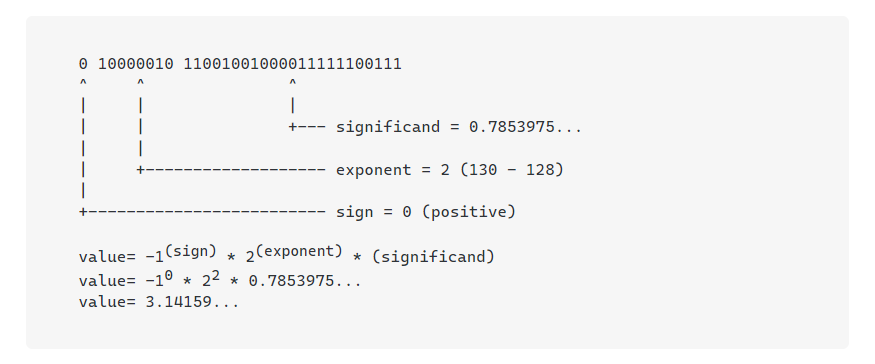

In [ ]:
# example
3.123567777777777 * 1e5
0.000000056789212 * 1e1

0.000000000000567 * 1e5

result = (3.123567777777777 * 1e5 - 0.000000000000567 * 1e5)/0.000000000000567 * 1e5

### Write a numerical finite differentiation program using the forward difference formula. 

In [8]:
forward_diff(f, x, h) = (f(x+h) - f(x)) / h;

#### Calculate the derivative of $f(x)$ at $x=1.2$ using various values of $h$, including Nash's formula. Which one is the best?

In [9]:
res1 = find_best_h(forward_diff, f, 1.2)
println("h = ", res1[1], " is the best")

h = nash formula is the best


### Write a numerical finite differentiation program using the central difference formula. 

In [10]:
central_diff(f, x, h) = (f(x+h/2) - f(x-h/2)) / h;

#### Calculate the derivative of $f(x)$ at $x=1.2$ using various values of $h$, including Nash's formula. Which one is the best?

In [11]:
res2 = find_best_h(central_diff, f, 1.2)
println("h = ", res2[1], " is the best")

h = 1.0e-5 is the best


In [12]:
@printf "forward error: %.16f\n" res1[2]
@printf "central error: %.16f" res2[2]

forward error: 0.0000000048296144
central error: 0.0000000000087473

### Use Julia's package `FiniteDifferences` to compute the derivative of $f(x)$ at $x=1.2$

In [13]:
res_c = central_fdm(5, 1)(f, 1.2)
res_f = forward_fdm(5, 1)(f, 1.2)
res_b = backward_fdm(5, 1)(f, 1.2)

@printf "central error:  %.16f\n" abs(res_c-true_val)
@printf "forward error:  %.16f\n" abs(res_f-true_val)
@printf "backward error: %.16f" abs(res_b-true_val)

central error:  0.0000000000000497
forward error:  0.0000000000009840
backward error: 0.0000000000000493